#  Feature scaling and Learning Rate (Multi-variable)


# Goal
- how learning rate change the cost
- normalize or rescale the training examples

In [60]:
import copy, math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
#compute derivatve
def derivatve(w,b,y,x,lambda_):
    m = x.shape[0]
    n = x.shape[1]
    dj_w = np.zeros(n)
    dj_b = 0
    for i in range(m):
        err=(np.dot(w,x[i])+b)-y[i]
        for j in range(n):
            dj_w[j]+=err*x[i][j]
        dj_b+=err
    dj_w/=m
    for i in range(n):
        dj_w[i]+=(lambda_/m)*w[i]
    return dj_w,dj_b/m


In [102]:
#gradient
def gradient(w,b,x,y,l_r,times,mod,lambda_):
    cost = []
    ite = []
    for i in range(times):
        ans = derivatve(w,b,y,x,lambda_)
        w=w-l_r*ans[0]
        b=b-l_r*ans[1]
        if i % mod ==0:
            cost.append(cost_f(predict(w,b,x),y,w,lambda_))
            ite.append(i)
    return w,b,cost,ite

In [103]:
# compute predict output
def predict(w,b,x):
    return np.dot(x,w)+b


In [104]:
#compute cost f (square avreage error)
def cost_f(y_hat,y,w,lambda_):
    m = y.shape[0]
    cost = 0
    for i in range(m):
        cost+=(y_hat[i]-y[i])**2
    cost/=(2*m)
    reg_cost = 0
    for i in w:
        reg_cost+=i**2
    reg_cost=reg_cost*(lambda_/(2*m))
    return cost+reg_cost


# Feature Scaling
- Z-score normalization

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [105]:
def z_score(x):
    m = x.shape[0]
    n = x.shape[1]
    mu =np.mean(X_train,axis=0)
    sigma = np.std(X_train,axis=0)
    X_norm = (x-mu)/sigma
    return X_norm,mu,sigma
            
    

# test the model

ite: 0, cost = 28284.54934163277
ite: 10000, cost = 7.674038885990003e-27
ite: 20000, cost = 7.674038885990003e-27
ite: 30000, cost = 7.674038885990003e-27
ite: 40000, cost = 7.674038885990003e-27
w= [ 38.05161505  41.54327451 -30.98894656  36.34177447]
b = 289.9999999999999


<AxesSubplot:xlabel='iterations', ylabel='cost'>

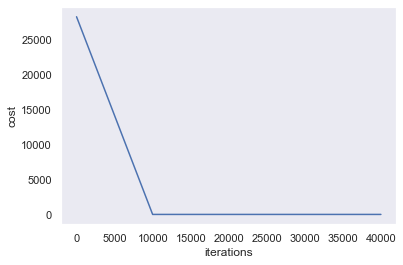

In [154]:
#get result
#X_train, y_train = load_house_data()

X_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])

y_train = np.array([460, 232, 178])
#X_train = np.array([[0],[1],[2],[3],[4],[5]])
#y_train = np.array([0,  0, 0, 1, 1, 1])
#to rescale feature
X_train,mu,sigma = z_score(X_train)
b_i = 0
w_i = np.zeros(X_train.shape[1] )
w,b,cost,ite=gradient(w_i,b_i,X_train,y_train,0.2,times=50000,mod=10000,lambda_=0)
for i in range(len(cost)):
    print(f"ite: {ite[i]}, cost = {cost[i]}")
print(f"w= {w}")
print(f"b = {b}")
sns.set(style="dark")
dd = {
  "iterations":ite,
  "cost": cost
}
df = pd.DataFrame(dd)
sns.lineplot(x="iterations",
             y="cost",data=df)

In [155]:
#run model 
x=np.array([[2104, 5, 1, 45]])#target=460
#must rescale the input
x = (x-mu)/sigma
#predict
print(np.dot(x,w)+b)

[460.]
